# Demo - Using CSLearn to Train an Image Autoencoder

This notebook provides a demo that shows how to use the ImageLearningController API to train an image autoencoder model on the MNIST dataset. This model uses a custom CNN architecture and is trained using the MSE loss function.

### Preliminaries - Import and Initialize

First, we'll import the API from the `controllers` module. Then we'll initialize the API, telling it that we intend to train an autoencoder.

In [1]:
from cslearn.controllers import ImageLearningController

ctrl = ImageLearningController(learner_type='autoencoder')

2024-01-29 17:24:58.294385: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 17:24:58.320151: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 1: Create the Data Loaders

Next we'll use the `create_data_loaders` method to indicate what data we'll be using to train our classifier. MNIST is available to use out of the box.

`create_data_loaders` creates `tf.data.Dataset` objects under the hood to handle the data that is passed to the model during training. As a consequence, we need to specify the batch size used when creating the data loaders - this will be the minibatch size used during training of the models.

In [2]:
ctrl.create_data_loaders(dataset='mnist', batch_size=64)

### Step 2: Create and Compile the Model(s)

The next step is to create the learner that we'll be training. This is done using the `create_learner` method. Note that this method creates multiple models assigned as attributes to our `ctrl` object - for the autoencoder model type, it creates `encoder` and `decoder` sub-models and the overall autoencoder model that is stored as `model`. You can customize nearly every aspect of the CNN - we'll use the default parameters here.

In [3]:
ctrl.create_learner(latent_dim=2, architecture='custom_cnn')

After creating the leaner, we need to compile it. This is done with the `compile_leaner` method, which takes arguments such as the loss function to be used and metrics to save during training. For the autoencoder, we want to use the MSE loss, and we do not need to specify any metrics.

In [4]:
ctrl.compile_learner(loss='mse')

CSLearn comes with a helper method for summarizing the models that you created - simply call `summarize_models` with no inputs.

In [5]:
ctrl.summarize_models()




_________________________________________________________________
                           custom_conv_encoder                          
_________________________________________________________________
 Layer                       Output Shape              Param #   
 input_1                     (None, 28, 28, 1)         0
 convolution_block           (None, 14, 14, 16)        864
 convolution_block_1         (None, 14, 14, 16)        6480
 convolution_block_2         (None, 7, 7, 32)          4768
 convolution_block_3         (None, 7, 7, 32)          9376
 global_average_pooling2d    (None, 32)                0
 dense                       (None, 2)                 66
Total params: 21554
Trainable params: 21362
Non-trainable params: 192
_________________________________________________________________




_________________________________________________________________
                           custom_conv_decoder                          
____________________________________

### Step 3: Train the Learner

After we have created and compiled the leaner, we use the `train_leaner` method to initiate training. This method takes various parameters related to the training algorithm. We'll only specify the number of epochs and indicate that we would like a verbose output during training.

In [6]:
ctrl.train_learner(epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.4723 - val_loss: 0.2031
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1851 - val_loss: 0.1813
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1773 - val_loss: 0.1778
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.1741 - val_loss: 0.1757
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.1708 - val_loss: 0.1824
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.1683 - val_loss: 0.1678
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1665 - val_loss: 0.1738
Epoch 8/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1650 - val_loss: 0.1678
Epoch 9/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1636 - val_loss: 0.1676
Epoch 10/10
938/938 [==============================] - 10s 10ms/step - loss: 0.162

### Step 4: Evaluation

After the model has been trained, we can call multiple methods that will perform some kind of evaluation on the result. These methods begin with `eval_` followed by a description of the evaluation performed.

First, we'll just call a simple method that plots the training and validation loss curves.

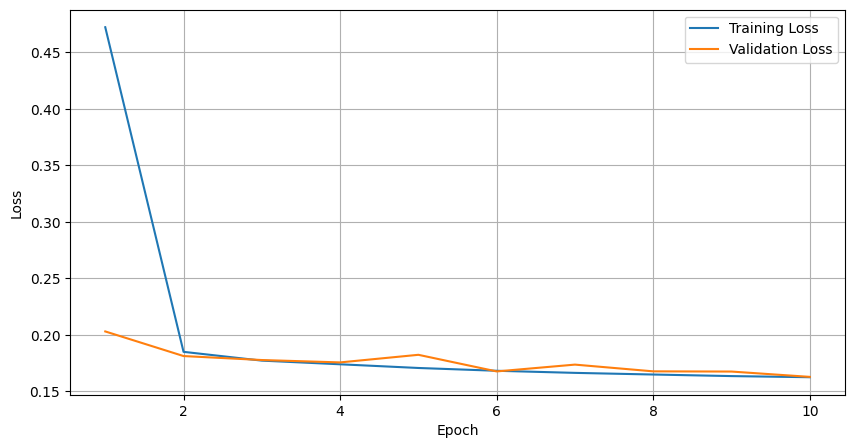

In [7]:
ctrl.eval_plot_loss_curves(which='both')

Other evaluation methods for the autoencoder learner are shown below.

Computing features...
Done.


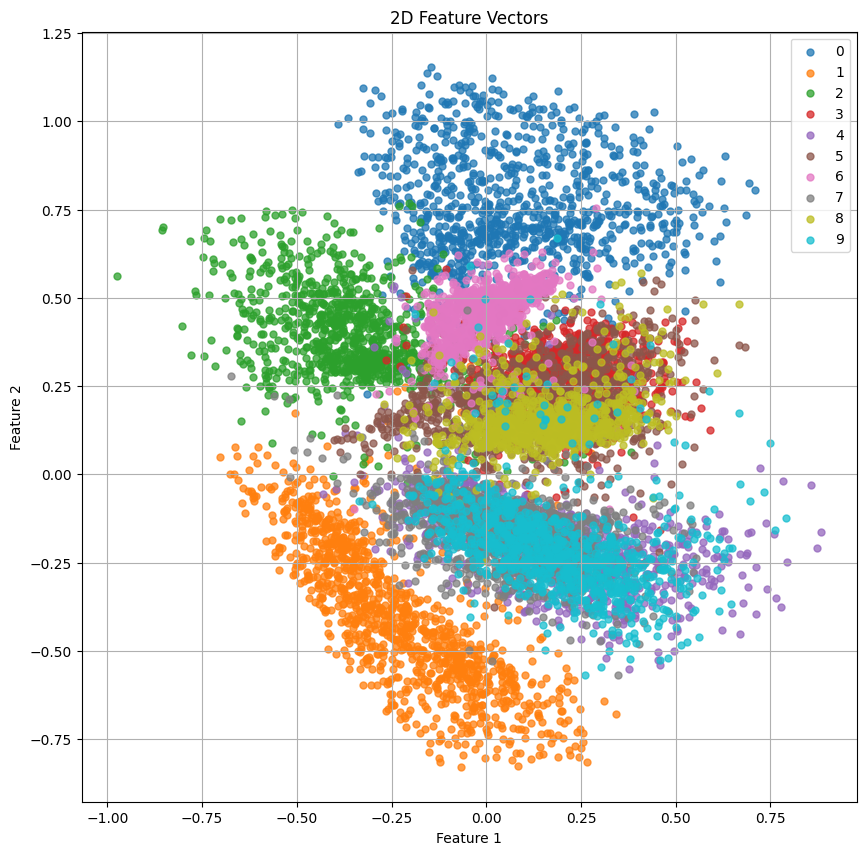

1/1 [==============================] - 0s 64ms/step


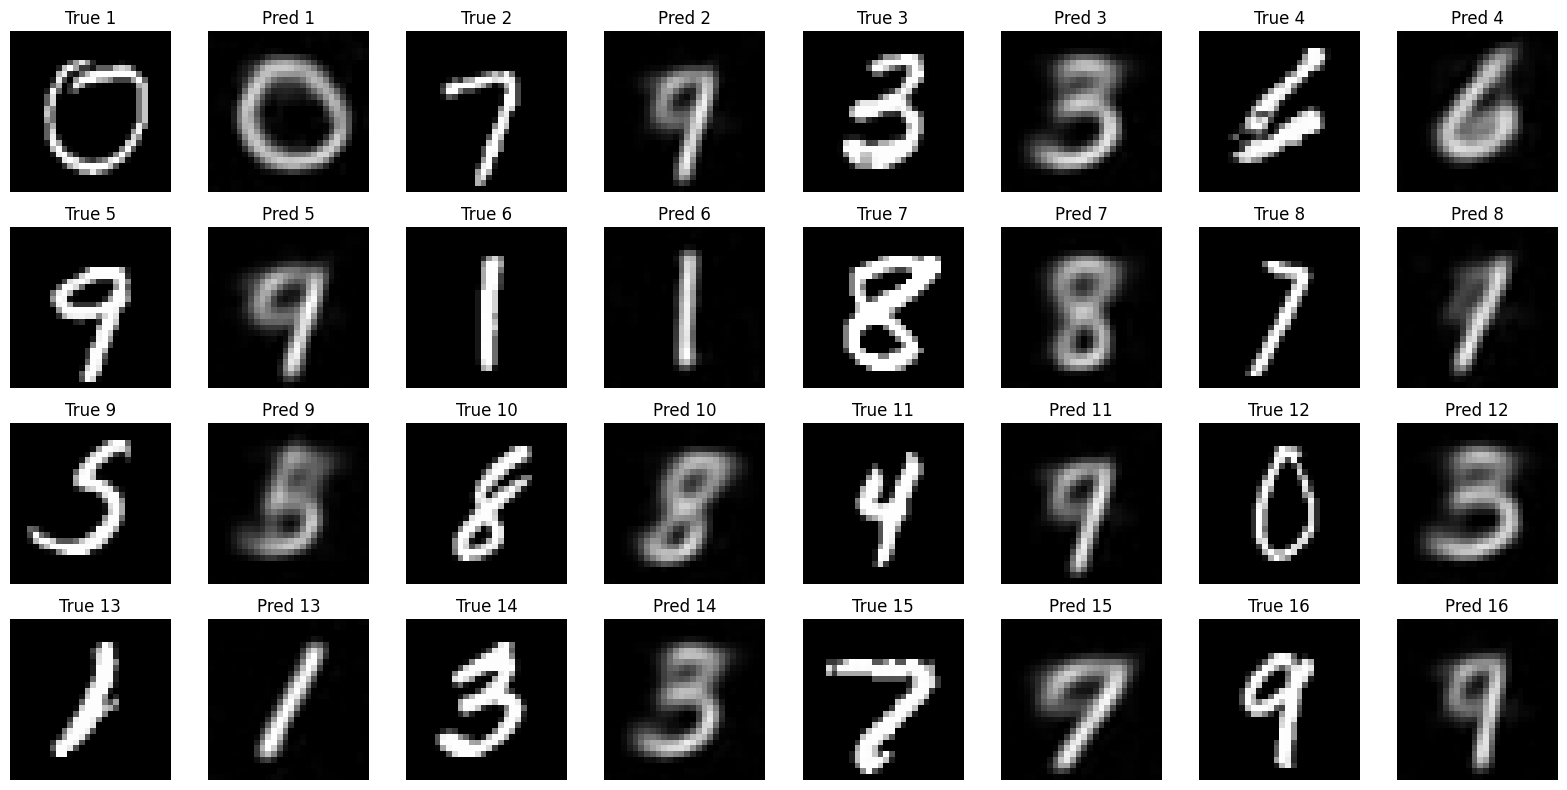

In [8]:
legend = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ctrl.eval_plot_scattered_features(
    which='validation',
    legend=legend
)
ctrl.eval_compare_true_and_generated()